In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",1)
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [15]:
df.shape #return rows and columns number

(5000, 14)

In [17]:
df.isnull().sum() #find null values 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.drop(['ID','ZIP Code'],axis=1,inplace = True)

In [7]:
# 5 number summary
import plotly.express as ps

In [8]:
fig=ps.box(df,y = ['Age','Experience','Income','Family','Eduction'])
fig.show()

In [9]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

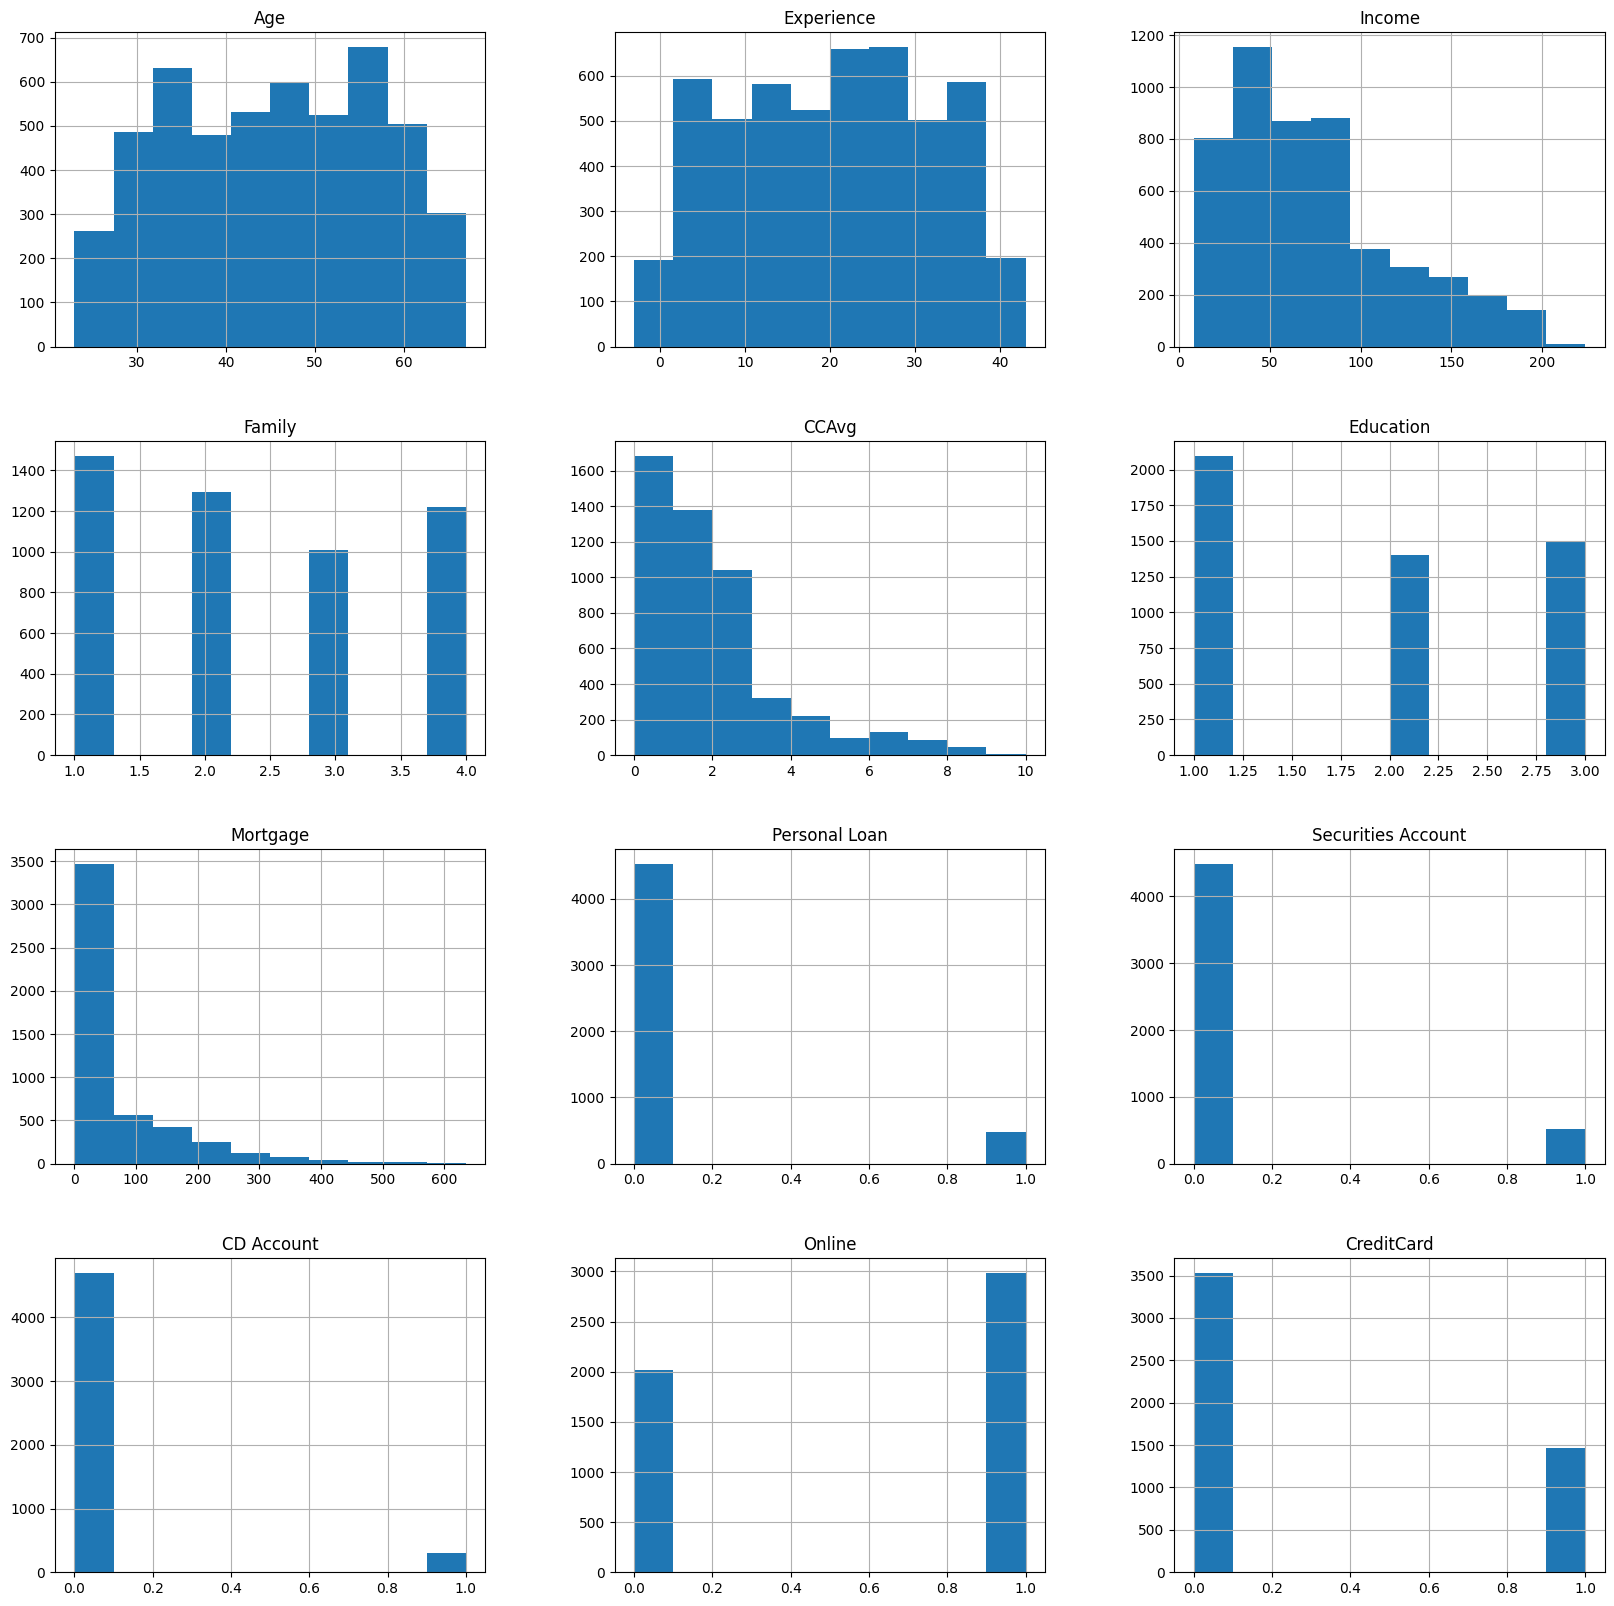

In [11]:
df.hist(figsize=(20,20))

C:\Users\91771\AppData\Local\Temp\ipykernel_10588\4238072937.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

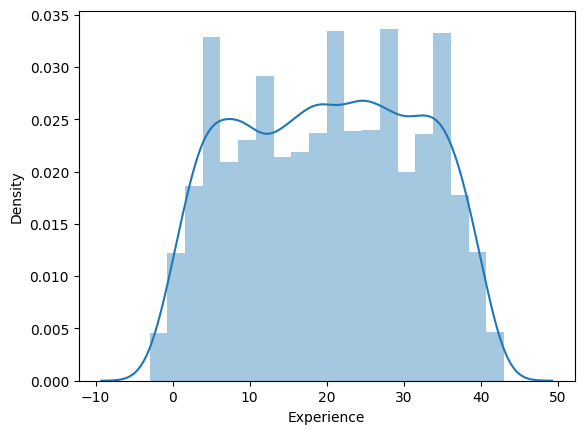

In [12]:
sns.distplot(df['Experience']) 

In [13]:
df['Experience'].mean()

20.1046

In [14]:
negative_exp = df[df['Experience']<0]
negative_exp.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
89    25          -1     113       4   2.30          3         0   
226   24          -1      39       2   1.70          2         0   
315   24          -2      51       3   0.30          3         0   
451   28          -2      48       2   1.75          3        89   
524   24          -1      75       4   0.20          1         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
89               0                   0           0       0           1  
226              0                   0           0       0           0  
315              0                   0           0       1           0  
451              0                   0           0       1           0  
524              0                   0           0       1           0

In [15]:
negative_exp.shape


(52, 12)

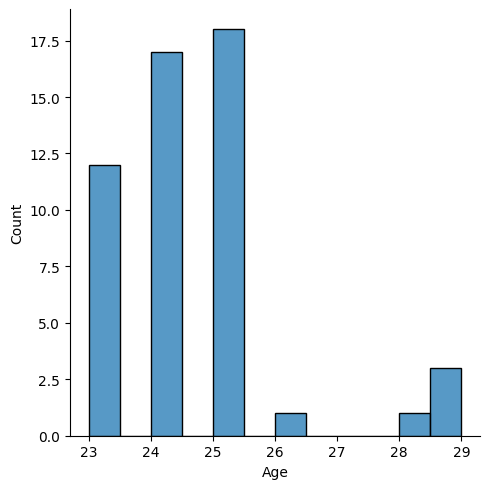

In [16]:
sns.displot(negative_exp['Age'])

In [17]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [18]:
negative_exp.size

624

In [19]:
print('There are {} records which has negative values for experience,aprox{} %'. format(negative_exp.size,((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience,aprox1.04 %


In [20]:
data  = df.copy()

In [21]:
data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [22]:
data.shape

(5000, 12)

In [23]:
df.shape

(5000, 12)

In [24]:
import numpy as np

In [25]:
data['Experience']=np.where(data['Experience']<0,
                            data['Experience'].mean(),
                           data['Experience'])
# p.where(condition, value_if_true, value_if_false):
# If the condition (data['Experience'] < 0) is True, 
# it replaces the negative value with the mean of all values in the 'Experience' column.
# If the condition (data['Experience'] < 0) is False, it keeps the original value 
# from the 'Experience' column as is.

In [26]:
data[data['Experience']<0]

Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

<Axes: >

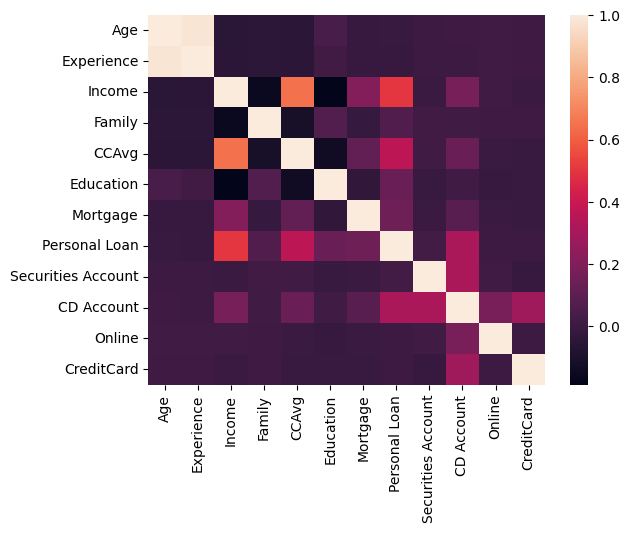

In [27]:
sns.heatmap(data.corr())
# visualizes the correlation matrix of the numerical variables 
# Darker shades might represent higher correlations (positive or negative).
# Lighter shades might represent weaker or no correlation.
# The heatmap will show darker colors between variables that are highly correlated
# (close to 1 or -1) and lighter colors where correlations are weaker (closer to 0).

<Axes: >

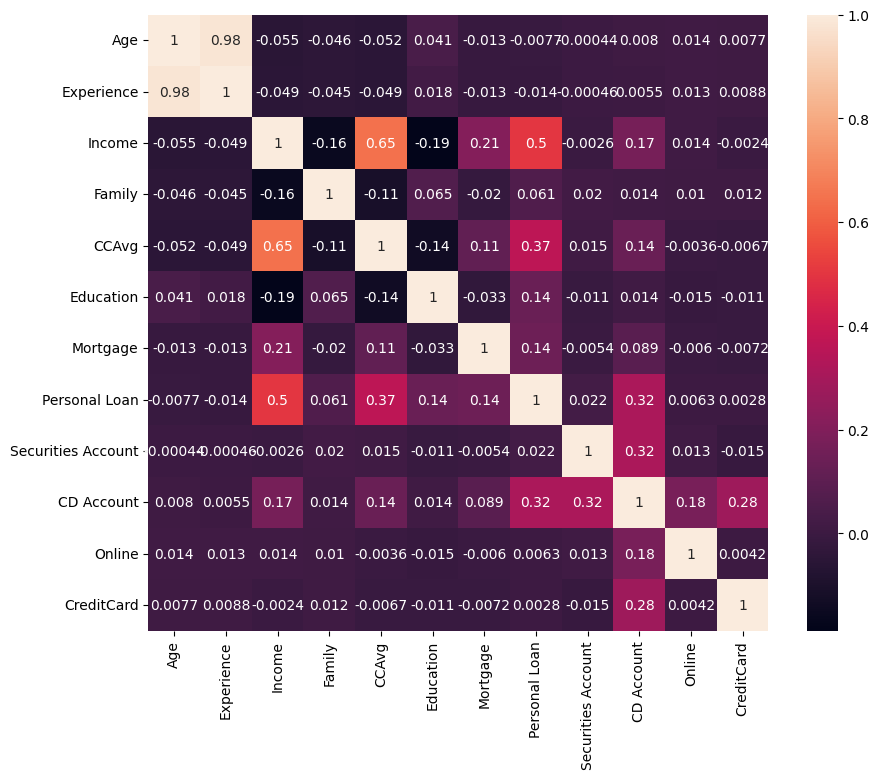

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot = True)

In [29]:
data= data.drop(['Experience'],axis=1)

In [30]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [31]:
# education
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [32]:
def experience (x):
    if x==1:
        return"undergrade"
    if x==2:
        return"graduate"
    if x==3:
        return"professional person"

In [33]:
data['EDU']=data['Education'].apply(experience)

In [34]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard         EDU  
0                   1           0       0           0  undergrade  
1                   1           0       0           0  undergrade  
2                   0           0       0           0  undergrade  
3                   0           0       0           0    graduate  
4                   0           0       0           1    graduate

In [35]:
data['EDU'].unique()

array(['undergrade', 'graduate', 'professional person'], dtype=object)

In [36]:
education_dis = data.groupby('EDU')['Age'].count()

In [37]:
education_dis

EDU
graduate               1403
professional person    1501
undergrade             2096
Name: Age, dtype: int64

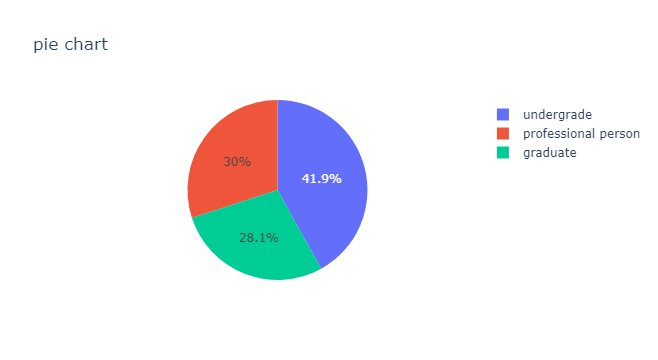

In [38]:
import plotly.express as ps
fig= ps.pie(data , values=education_dis,names = education_dis.index, title ='pie chart' )
fig.show()

In [39]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU'],
      dtype='object')

In [40]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [41]:
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [42]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [43]:
def security(y):
    if(y['Securities Account']==1) & (y['CD Account'] == 1):
        return "hold securities & deposite"
    if(y['Securities Account']==0) & (y['CD Account']==0):
        return "does not hold Securities & deposite account"
    if(y['Securities Account']==1) & (y['CD Account']==0):
        return " holds only security"
    if(y['Securities Account']==0) & (y['CD Account']==1):
        return " hold only deposite account"
        

In [44]:
data['Account_holder_category']= data.apply(security , axis =1)

In [45]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard         EDU  \
0                   1           0       0           0  undergrade   
1                   1           0       0           0  undergrade   
2                   0           0       0           0  undergrade   
3                   0           0       0           0    graduate   
4                   0           0       0           1    graduate   

                       Account_holder_category  
0                          holds only security  
1                          holds only security  
2  does not hold Securities & deposite account  
3  does not hold Securities & deposite account  
4  does not hold Securities & deposite account

In [47]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['does not hold Securities & deposite account', ' holds only security',
       ' hold only deposite account', 'hold securities & deposite'],
      dtype='object', name='Account_holder_category')

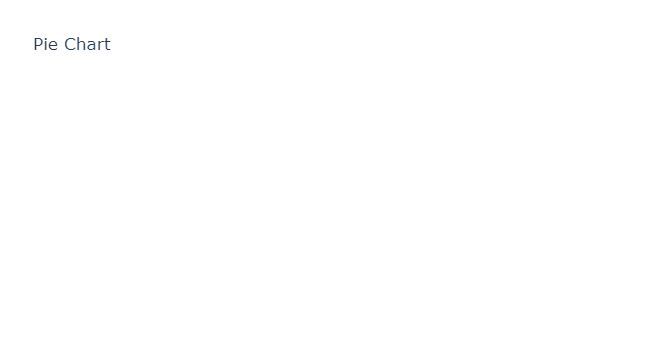

In [64]:
fig = ps.pie(data_frame=data, 
             values='Account_holder_category',  # This should be a numeric column for values
             names='Account_holder_category',   # This should be the categorical column for names
             title='Pie Chart')

fig.show()

In [65]:
data.columns


Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

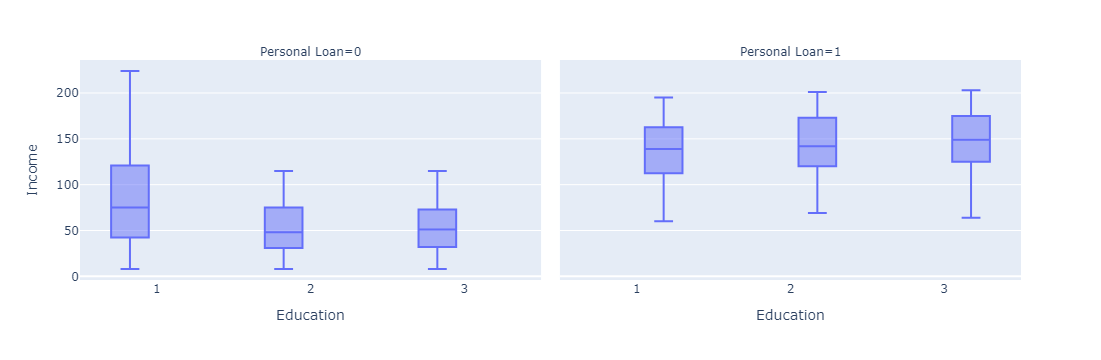

In [67]:
ps.box(data, x ='Education' , y ='Income' , facet_col ='Personal Loan')

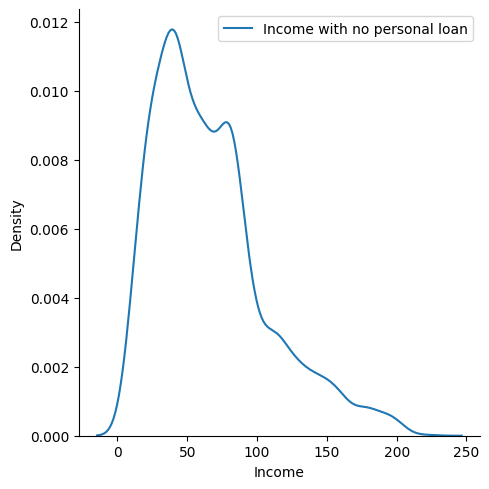

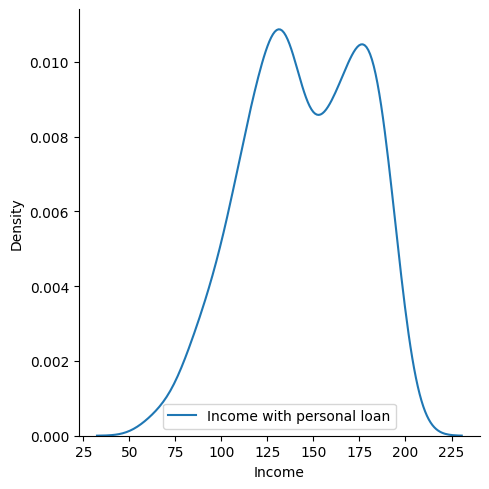

In [80]:
sns.displot(data[data['Personal Loan']==0]['Income'], kind='kde',
           label = "Income with no personal loan")
plt.legend()
sns.displot(data[data['Personal Loan']==1]['Income'], kind='kde', 
            label="Income with personal loan")
plt.legend()

In [91]:
def plot(col1, col2, label1 , label2 ):
    sns.displot(data[data[col2]==0][col1], kind='kde',
           label = label1)
    ns.displot(data[data[col2]==1][col1], kind='kde',
           label = label2)
   
    plt.legend()
# plt.title(title)

NameError: name 'ns' is not defined

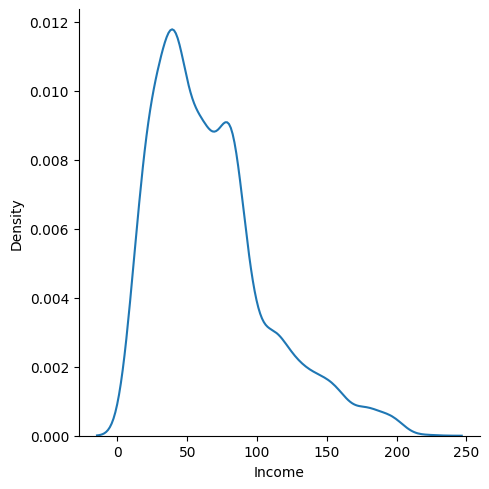

In [92]:
plot('Income','Personal Loan','Income with no personal loan',
     'Income with personal loan')

NameError: name 'ns' is not defined

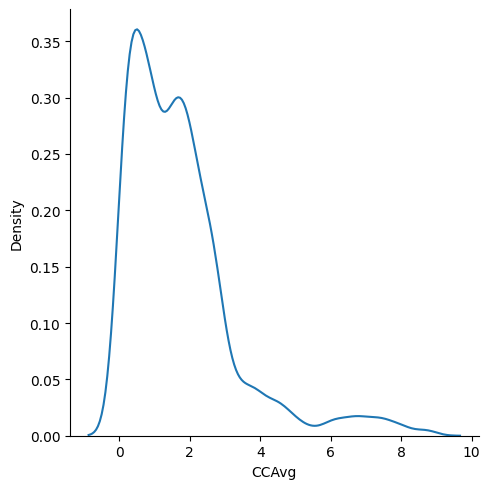

In [95]:
plot('CCAvg','Personal Loan','cerdit with no personal loan',
     'credit with personal loan')

In [96]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [97]:
col=['Securities Account','Online',
       'CreditCard', 'Account_holder_category']

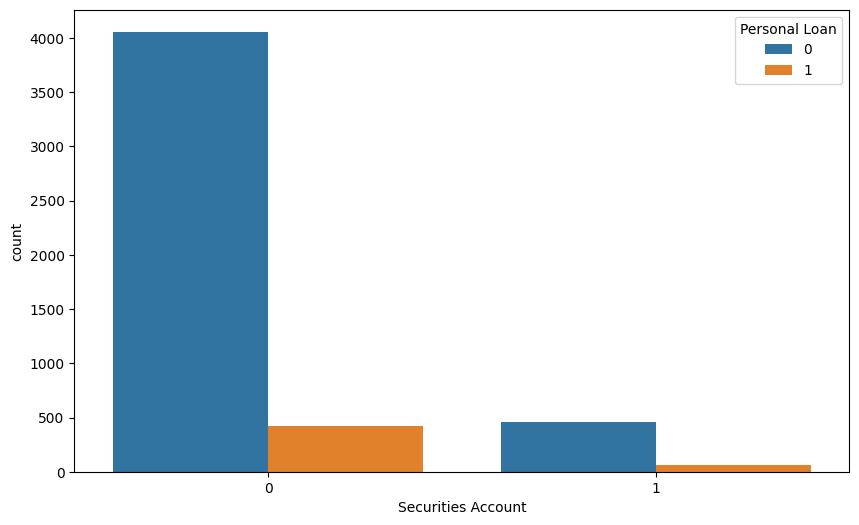

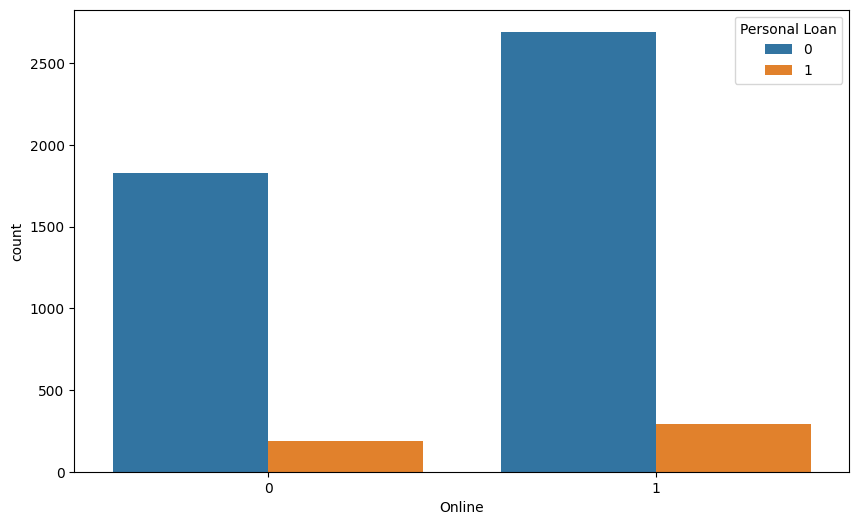

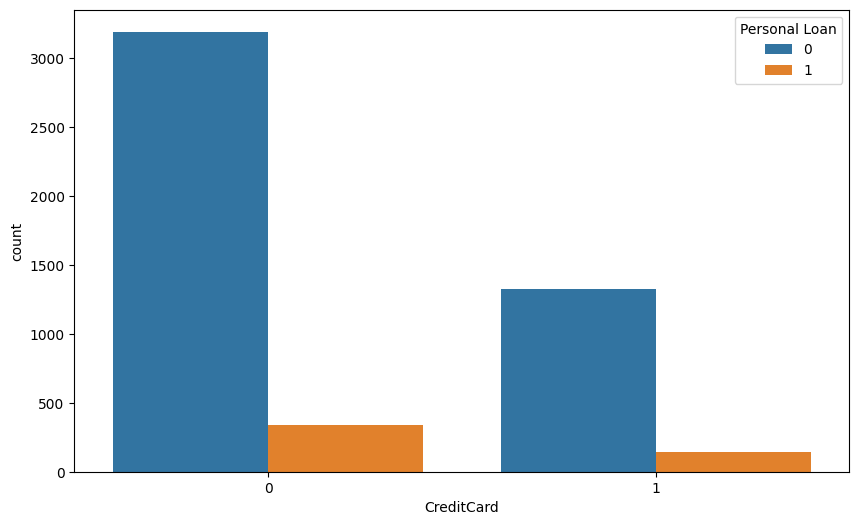

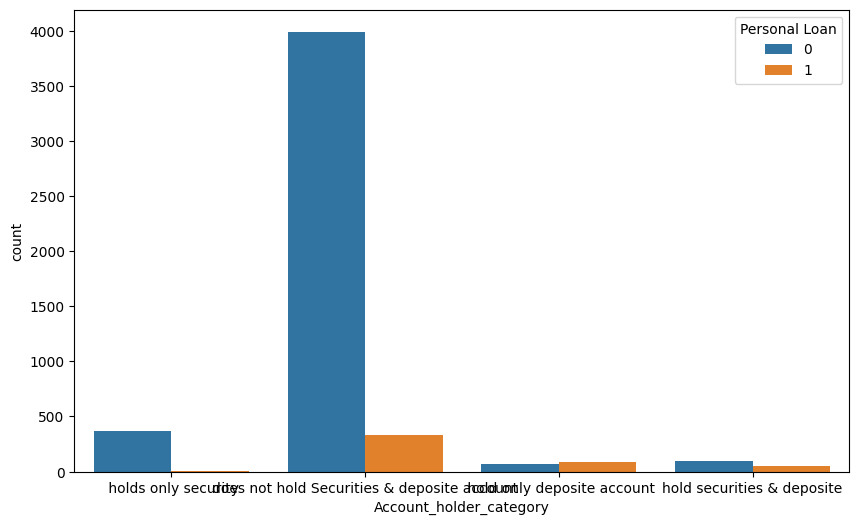

In [102]:
for i in col:
    plt.figure(figsize =(10,6))
    sns.countplot(x = i , data = data , hue ='Personal Loan')

In [105]:
from scipy.stats import zscore

In [113]:
q1 =  data.quantile(0.25)
q3= data.quantile(0.75)

IQR = q3 -q1
print(IQR)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [114]:
# LOG NORMAL TRANSFORMATION 
data_1 = data[['Income','CCAvg']]
data_1 = np.log(data_1  + 1)
data_1

Income     CCAvg
0     3.912023  0.955511
1     3.555348  0.916291
2     2.484907  0.693147
3     4.615121  1.308333
4     3.828641  0.693147
...        ...       ...
4995  3.713572  1.064711
4996  2.772589  0.336472
4997  3.218876  0.262364
4998  3.912023  0.405465
4999  4.430817  0.587787

[5000 rows x 2 columns]

In [ ]:
!pip install scikit-learn


In [ ]:
# power transformation
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(methode ='yeo-johson' , standardize=False )
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.tranform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()

Conclusion
-handle outliers
- convert categories into numerical
- data fit
- model building 
-logical 